In [34]:
#Importing the libraries
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import harmonize as hz
import matplotlib.dates as mdates
from matplotlib.widgets import Cursor

# Funtions to describe the datasets

In [2]:
# Function to print the descriptive statistics of the dataset
def print_corr_statistics(matrix):
  # Print descriptive statistics of the correlation matrix
  print('Mean of the correlation matrix : ', matrix.mean().values)
  print('Standard deviation of the correlation matrix : ', matrix.std().values)
  print('Minimum of the correlation matrix : ', matrix.min().values)
  print('Maximum of the correlation matrix : ', matrix.max().values)

In [3]:
# Definition of a function that prints the time range of the dataset with his names displayed
def print_start_end_date(ds):
    print("Start date : ", ds.time[0].values)
    print("End date: ", ds.time[-1].values)


In [4]:
def time_resolution(ds):
    time = (ds.time[2] - ds.time[1]).values
    return time

In [5]:
# Function to convert nanoseconds to days
def convert_nanoseconds_to_days(nanoseconds):
    return nanoseconds / 86400000000000


In [6]:
# Function to print the descriptive statistics of the dataset
def print_dataset_statistics(ds):
    print("Descriptive statistics of the dataset")
    print('The mean of the dataset is : ', ds.mean().values)
    print('The median of the dataset is : ', ds.median().values)
    print('The standard deviation of the dataset is : ', ds.std().values)
    print('The minimum value of the dataset is : ', ds.min().values)
    print('The maximum value of the dataset is : ', ds.max().values)




# Description of the DATASETS used

## Importing datasets

In [7]:
# Open the dataset with xarray
path_data = "../data/Raw/"
ndvi = xr.open_dataset(path_data +'Raw_NDVI_16D_1km.nc')
lai = xr.open_dataset(path_data +'Raw_LAI_8D_500m.nc')
evap = xr.open_dataset(path_data +'Raw_Evap_8D_500m.nc')
era = xr.open_dataset(path_data +'Raw_weather_4H_9km.nc')
lst_night = xr.open_dataset(path_data +'Raw_LST_Night_1D_1km.nc')
lst_day = xr.open_dataset(path_data +'Raw_LST_Day_1D_1km.nc')
active_fire = xr.open_dataset(path_data +'Raw_ActiveFire_500m.nc')
burn_mask = xr.open_dataset(path_data +'Raw_BurnMask_1km.nc')
fwi = xr.open_mfdataset(path_data+'/Raw_Fwi/*.nc', combine='by_coords', chunks=None)
density = rxr.open_rasterio(path_data +'fra_pd_2015_1km_UNadj.tif').squeeze()

## Description of the datasets

### NDVI

In [41]:
# NDVI
print(ndvi)

<xarray.Dataset>
Dimensions:                   (time: 293, ydim: 253, xdim: 298)
Coordinates:
  * time                      (time) object 2009-12-19 00:00:00 ... 2022-08-2...
  * ydim                      (ydim) float64 5.018e+06 5.017e+06 ... 4.785e+06
  * xdim                      (xdim) float64 3.415e+05 3.424e+05 ... 6.167e+05
Data variables:
    crs                       int8 ...
    _1_km_16_days_EVI         (time, ydim, xdim) float32 ...
    _1_km_16_days_NDVI        (time, ydim, xdim) float32 ...
    _1_km_16_days_VI_Quality  (time, ydim, xdim) float64 ...
Attributes:
    title:        MOD13A2.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.12
    references:   See README.md
    history:      See README.md


In [ ]:
print_start_end_date(ndvi)

In [ ]:
# Print descriptive statistics of the dataset
print_dataset_statistics(ndvi)

In [ ]:
plt.rcParams["figure.figsize"] = [6, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
ndvi['_1_km_16_days_NDVI'].plot()
plt.title("NDVI distribution")

plt.subplot(2,2,2)
ndvi['_1_km_16_days_EVI'].plot()
plt.title("EVI distribution")

plt.subplot(2,2,3)
ndvi['_1_km_16_days_VI_Quality'].plot()
plt.title("Quality distribution")
#plt.savefig("NDVI_EVI_Quality_distrib.png")
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
ndvi['_1_km_16_days_NDVI'][1].plot()
plt.title("NDVI")

plt.subplot(2,2,2)
ndvi['_1_km_16_days_EVI'][1].plot()
plt.title("EVI")

plt.subplot(2,2,3)
ndvi['_1_km_16_days_VI_Quality'][1].plot()
plt.title("Quality")
#plt.savefig("NDVI_EVI_Quality_plot.png")
plt.show()

#### Lookups on the correlation matrix


In [29]:
#Correlation matrix
ndvi_corr= xr.corr(ndvi['_1_km_16_days_EVI'],ndvi['_1_km_16_days_NDVI'], dim=['ydim','xdim','time'])


In [30]:
print(ndvi_corr)

<xarray.DataArray ()>
array(0.87530839)


In [ ]:
# Print descriptive statistics of the correlation matrix
print('Mean of the correlation matrix : ', ndvi_corr.mean().values)
print('Standard deviation of the correlation matrix : ', ndvi_corr.std().values)
print('Minimum of the correlation matrix : ', ndvi_corr.min().values)
print('Maximum of the correlation matrix : ', ndvi_corr.max().values)

We can see there is a strong correlation between NDVI and EVI, which is expected, and we will keep only EVI as it is an upgrade of the NDVI.

### LAI

In [ ]:
# LAI
print(lai)

In [ ]:
print_start_end_date(lai)

In [25]:
# Print descriptive statistics of the dataset
print_dataset_statistics(lai)

Descriptive statistics of the dataset
The mean of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:          ()
Data variables:
    crs              float64 -127.0
    FparExtra_QC     float32 107.3
    FparLai_QC       float32 19.56
    FparStdDev_500m  float32 0.404
    Fpar_500m        float32 0.5842
    LaiStdDev_500m   float32 3.816
    Lai_500m         float32 2.669>
The median of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:          ()
Data variables:
    crs              float64 -127.0
    FparExtra_QC     float64 128.0
    FparLai_QC       float64 0.0
    FparStdDev_500m  float64 0.05
    Fpar_500m        float64 0.49
    LaiStdDev_500m   float64 0.2
    Lai_500m         float64 1.0>
The standard deviation of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:          ()
Data variables:
    crs              float64 0.0
    FparExtra_QC     float64 60.79
    FparLai_QC       float64 40.51

In [ ]:
#PLot LAI variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'][1].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'][1].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'][1].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'][1].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'][1].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'][1].plot()
plt.title("FparExtra_QC")

#plt.savefig("LAI_plot.png")
plt.show()

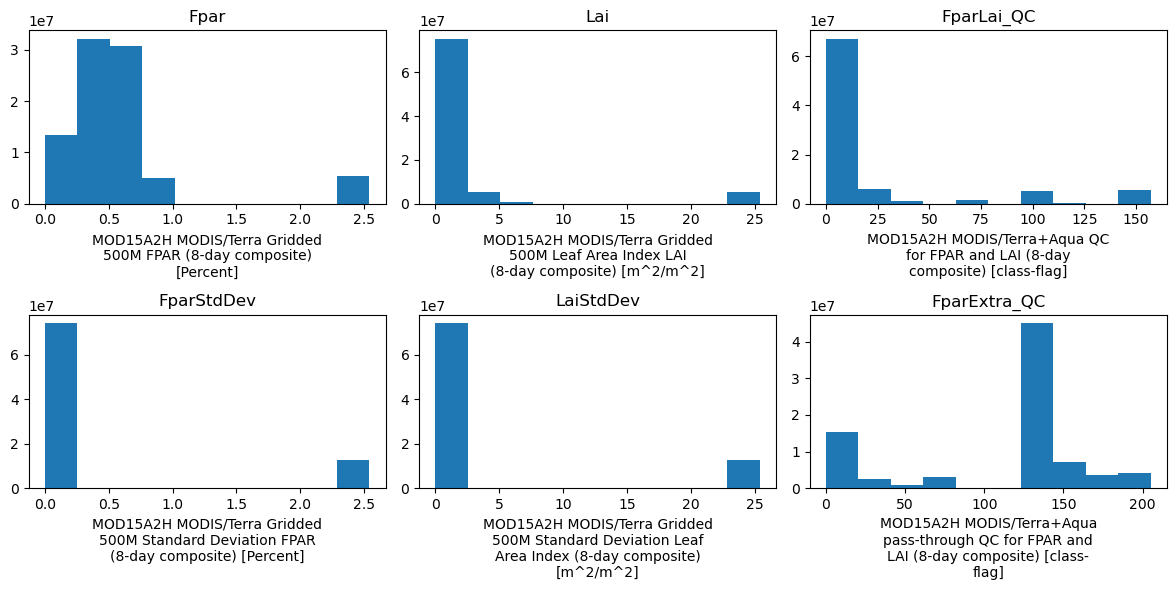

In [8]:
#PLot distribution of the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'].plot()
plt.title("FparExtra_QC")

#plt.savefig("LAI_distrib.png")
plt.show()



#### Lookups on the correlation matrix


In [12]:
#Correlation matrix
lai_corr= xr.corr(lai['Fpar_500m'],lai['Lai_500m'], dim=['ydim','xdim', 'time'])

In [13]:
print(lai_corr)

<xarray.DataArray ()>
array(0.96304774)


In [11]:
# Print descriptive statistics of the correlation matrix
print_corr_statistics(lai_corr)

Mean of the correlation matrix :  0.9691499267526592
Standard deviation of the correlation matrix :  0.01105879225038227
Minimum of the correlation matrix :  0.9474652527989066
Maximum of the correlation matrix :  0.9872452859426479


Leaf area index (LAI) and fraction of absorbed photosynthetically active radiation (fAPAR) are two biophysical
parameters that are closely related and often measured and validated in parallel in the field. LAI is typically
defined as the total one-sided area of leaf tissues per unit of ground surface area. Utilizing this definition,
LAI is a dimensionless unit which characterises the canopy of a given ecosystem (Breda, 2003). On the other
hand, fAPAR is defined as the fraction of photosynthetically active radiation (PAR) in the 400-700 nm
wavelengths that is absorbed by a canopy and it can include over-storey, understory and ground cover
elements.

We can see that there is a strong correlation between LAI and FPAR and we will keep only Fpar has it has a more centered distribution value closer to 0. It also emcompasses somehow the LAI.

### Evapotranspiration

In [14]:
# Evaporation
print(evap)

<xarray.Dataset>
Dimensions:     (time: 584, ydim: 505, xdim: 595)
Coordinates:
  * time        (time) object 2009-12-27 00:00:00 ... 2022-08-29 00:00:00
  * ydim        (ydim) float64 5.018e+06 5.017e+06 ... 4.785e+06 4.784e+06
  * xdim        (xdim) float64 3.412e+05 3.417e+05 ... 6.16e+05 6.164e+05
Data variables:
    crs         int8 ...
    ET_500m     (time, ydim, xdim) float32 ...
    ET_QC_500m  (time, ydim, xdim) float32 ...
    LE_500m     (time, ydim, xdim) float32 ...
    PET_500m    (time, ydim, xdim) float32 ...
    PLE_500m    (time, ydim, xdim) float32 ...
Attributes:
    title:        MOD16A2.006 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.12
    references:   See README.md
    history:      See README.md


In [15]:
# Print time range
print_start_end_date(evap)

Start date :  2009-12-27 00:00:00
End date:  2022-08-29 00:00:00


In [16]:
# Print descriptive statistics of the dataset
print_dataset_statistics(evap)

Descriptive statistics of the dataset
The mean of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:     ()
Data variables:
    crs         float64 -127.0
    ET_500m     float32 873.4
    ET_QC_500m  float32 19.64
    LE_500m     float32 8.935e+07
    PET_500m    float32 888.8
    PLE_500m    float32 9.407e+07>
The median of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:     ()
Data variables:
    crs         float64 -127.0
    ET_500m     float64 15.3
    ET_QC_500m  float64 0.0
    LE_500m     float64 4.71e+06
    PET_500m    float64 46.1
    PLE_500m    float64 1.418e+07>
The standard deviation of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:     ()
Data variables:
    crs         float64 0.0
    ET_500m     float64 1.272e+03
    ET_QC_500m  float64 40.49
    LE_500m     float64 1.179e+08
    PET_500m    float64 1.272e+03
    PLE_500m    float64 1.179e+08>
The minimum value of the dataset i

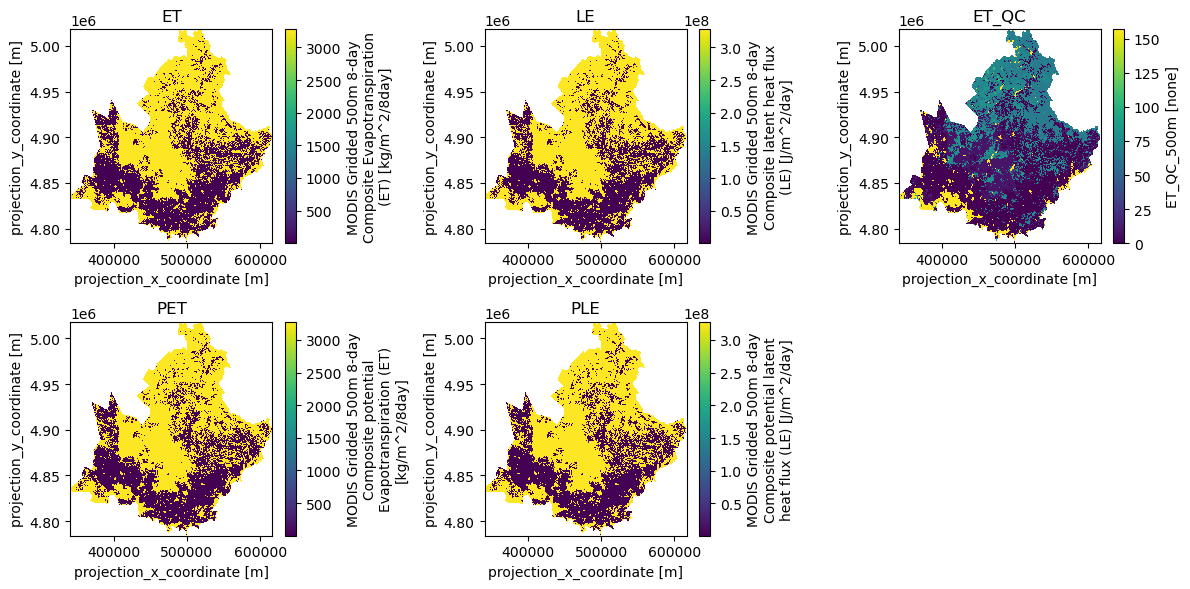

In [35]:
#PLot  the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
evap['ET_500m'][1].plot()
plt.title("ET")

plt.subplot(2,3,2)
evap['LE_500m'][1].plot()
plt.title("LE")

plt.subplot(2,3,4)
evap['PET_500m'][1].plot()
plt.title("PET")

plt.subplot(2,3,5)
evap['PLE_500m'][1].plot()
plt.title("PLE")

plt.subplot(2,3,3)
evap['ET_QC_500m'][1].plot()
plt.title("ET_QC")


plt.savefig("evap_plot.png")
plt.show()

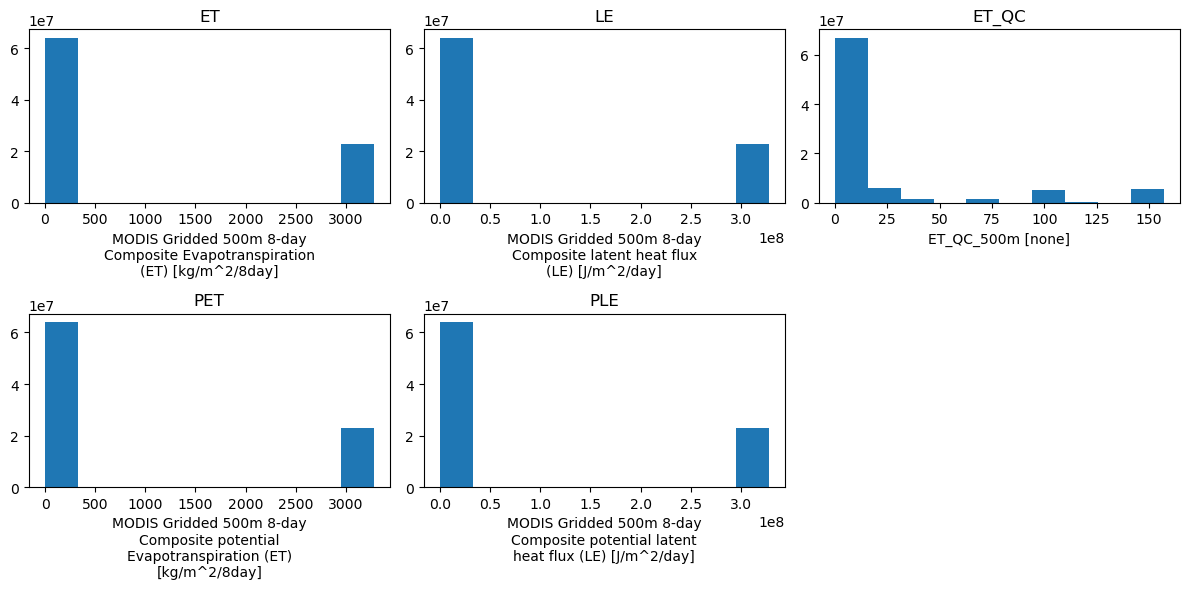

In [34]:
#PLot distribution of the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
evap['ET_500m'].plot()
plt.title("ET")

plt.subplot(2,3,2)
evap['LE_500m'].plot()
plt.title("LE")

plt.subplot(2,3,4)
evap['PET_500m'].plot()
plt.title("PET")

plt.subplot(2,3,5)
evap['PLE_500m'].plot()
plt.title("PLE")

plt.subplot(2,3,3)
evap['ET_QC_500m'].plot()
plt.title("ET_QC")


plt.savefig("evap_distrib.png")
plt.show()

#### Lookups on the correlation matrix

In [21]:
#Correlation matrix
evap_corr= xr.corr(evap['ET_500m'],evap['LE_500m'], dim=['ydim','xdim'])

In [22]:
print(evap_corr)

<xarray.DataArray (time: 584)>
array([0.99999927, 0.99999982, 0.99999957, 0.9999998 , 0.99999946,
       0.9999997 , 0.99999951, 0.99999929, 0.99999967, 0.99999949,
       0.99999859, 0.99999815, 0.99999773, 0.99999711, 0.99999238,
       0.99998951, 0.99999838, 0.99999288, 0.99996862, 0.99996601,
       0.99997276, 0.99997256, 0.99995975, 0.99991287, 0.99987763,
       0.99982944, 0.99989263, 0.99988299, 0.999884  , 0.99994286,
       0.99987934, 0.99991813, 0.99995985, 0.9999812 , 0.99998074,
       0.99998938, 0.99999791, 0.99999645, 0.99999829, 0.99999876,
       0.9999993 , 0.99999935, 0.99999958, 0.99999947, 0.99999952,
       0.99999959, 0.99999948, 0.99999962, 0.99999922, 0.9999993 ,
       0.99999923, 0.99999878, 0.99999947, 0.99999925, 0.99999956,
       0.99999942, 0.99999866, 0.99999735, 0.99999196, 0.99998139,
       0.99998704, 0.99999215, 0.99997315, 0.99997024, 0.99994239,
       0.99994046, 0.99998981, 0.99995622, 0.99992521, 0.9998186 ,
       0.99989678, 0.99995653, 

In [24]:
# Print descriptive statistics of the correlation matrix
print_corr_statistics(evap_corr)

Mean of the correlation matrix :  0.9999705003986419
Standard deviation of the correlation matrix :  4.529039130721324e-05
Minimum of the correlation matrix :  0.9997872187080483
Maximum of the correlation matrix :  0.9999999847401632


 ET is the mass of evaporated water per unit area per unit time, and LE is the latent heat flux, which is the energy flux associated with the evaporation of water. The two variables are strongly correlated, and we will keep only ET.

### ERA5

In [26]:
# ERA5
print(era)

<xarray.Dataset>
Dimensions:    (longitude: 36, latitude: 21, time: 22975)
Coordinates:
  * longitude  (longitude) float32 4.0 4.1 4.2 4.3 4.4 ... 7.1 7.2 7.3 7.4 7.5
  * latitude   (latitude) float32 45.0 44.9 44.8 44.7 ... 43.3 43.2 43.1 43.0
  * time       (time) datetime64[ns] 2010-01-01T04:00:00 ... 2022-07-31T20:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-15 13:57:35 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [27]:
# Print time range
print_start_end_date(era)

Start date :  2010-01-01T04:00:00.000000000
End date:  2022-07-31T20:00:00.000000000


In [28]:
# Print descriptive statistics of the dataset
print_dataset_statistics(era)

Descriptive statistics of the dataset
The mean of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float32 0.2543
    v10      float32 -0.6489
    t2m      float32 284.2
    tp       float32 0.001342>
The median of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float64 0.2021
    v10      float64 -0.4645
    t2m      float64 284.2
    tp       float64 9.31e-06>
The standard deviation of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float64 1.644
    v10      float64 2.106
    t2m      float64 23.65
    tp       float64 0.003943>
The minimum value of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float64 -17.09
    v10      float64 -15.89
    t2m      float64 244.5
    tp       float64 0.0>
The maximum value of the dataset is :  <bo

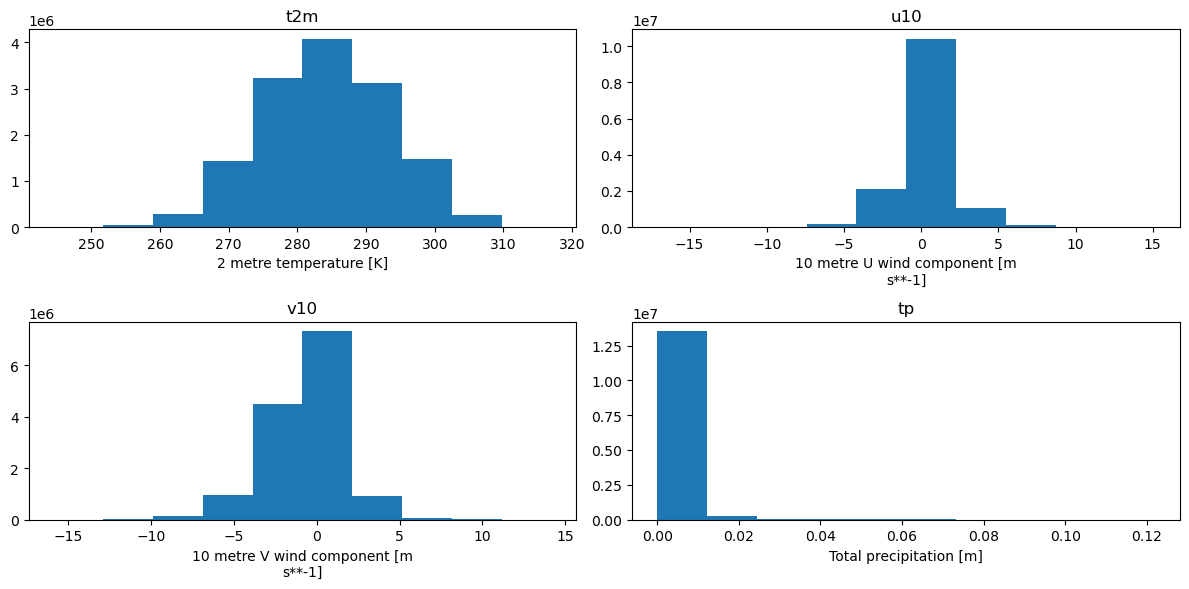

In [33]:
#PLot  the  variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
era['t2m'].plot()
plt.title("t2m")

plt.subplot(2,2,2)
era['u10'].plot()
plt.title("u10")

plt.subplot(2,2,3)
era['v10'].plot()
plt.title("v10")

plt.subplot(2,2,4)
era['tp'].plot()
plt.title("tp")

plt.savefig("era_plot.png")
plt.show()

### LST

#### LST day

In [36]:
# LST day
print(lst_day)

<xarray.Dataset>
Dimensions:      (time: 4622, ydim: 253, xdim: 298)
Coordinates:
  * time         (time) object 2009-12-28 00:00:00 ... 2022-09-01 00:00:00
  * ydim         (ydim) float64 5.018e+06 5.017e+06 ... 4.786e+06 4.785e+06
  * xdim         (xdim) float64 3.415e+05 3.424e+05 ... 6.157e+05 6.167e+05
Data variables:
    crs          int8 ...
    LST_Day_1km  (time, ydim, xdim) float64 ...
    QC_Day       (time, ydim, xdim) float32 ...
Attributes:
    title:        MOD11A1.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.12
    references:   See README.md
    history:      See README.md


In [51]:
# Print time range for lst_day and lst_night
print("\n-------")
print("The time range for lst_night is:")
print_start_end_date(lst_day)
print("\n-------")
print("The time range for lst_night is:")
print_start_end_date(lst_day)
print("\n-------")


-------
The time range for lst_night is:
Start date :  2009-12-28 00:00:00
End date:  2022-09-01 00:00:00

-------
The time range for lst_night is:
Start date :  2009-12-28 00:00:00
End date:  2022-09-01 00:00:00

-------


In [54]:
# Print the temporal resolution for lst_day and lst_night
print("\n-------")
print("The time resolution for lst_night is:")
print(lst_day['time'].diff('time').values/ np.timedelta64(1, 'D'))
print("\n-------")
print("The time resolution for lst_night is:")
print(lst_night['time'].diff('time').values/ np.timedelta64(1, 'D'))
print("\n-------")


-------
The time resolution for lst_night is:
[1. 1. 1. ... 1. 1. 1.]

-------
The time resolution for lst_night is:
[1. 1. 1. ... 1. 1. 1.]

-------


In [14]:
# Lookup on the variable
print('Info on LST_Day :',lst_day['LST_Day_1km'])
print('Info on LST_Night :',lst_night['LST_Night_1km'])

Info on LST_Day : <xarray.DataArray 'LST_Day_1km' (time: 4622, ydim: 253, xdim: 298)>
[348471068 values with dtype=float64]
Coordinates:
  * time     (time) object 2009-12-28 00:00:00 ... 2022-09-01 00:00:00
  * ydim     (ydim) float64 5.018e+06 5.017e+06 ... 4.786e+06 4.785e+06
  * xdim     (xdim) float64 3.415e+05 3.424e+05 ... 6.157e+05 6.167e+05
Attributes:
    grid_mapping:      crs
    valid_min:         7500
    valid_max:         65535
    long_name:         Daily daytime 1km grid Land-surface Temperature
    units:             K
    Number_Type:       uint16
    LST:               LST data * scale_factor
    scale_factor_err:  0.0
    add_offset_err:    0.0
    calibrated_nt:     5
Info on LST_Night : <xarray.DataArray 'LST_Night_1km' (time: 4622, ydim: 253, xdim: 298)>
[348471068 values with dtype=float64]
Coordinates:
  * time     (time) object 2009-12-28 00:00:00 ... 2022-09-01 00:00:00
  * ydim     (ydim) float64 5.018e+06 5.017e+06 ... 4.786e+06 4.785e+06
  * xdim     (xd

In [42]:
# Print descriptive statistics of the dataset
print_dataset_statistics(lst_day)

Descriptive statistics of the dataset
The mean of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:      ()
Data variables:
    crs          float64 -127.0
    LST_Day_1km  float64 291.7
    QC_Day       float32 16.26>
The median of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:      ()
Data variables:
    crs          float64 -127.0
    LST_Day_1km  float64 292.7
    QC_Day       float64 2.0>
The standard deviation of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:      ()
Data variables:
    crs          float64 0.0
    LST_Day_1km  float64 11.19
    QC_Day       float64 21.58>
The minimum value of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:      ()
Data variables:
    crs          int8 -127
    LST_Day_1km  float64 240.0
    QC_Day       float64 0.0>
The maximum value of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:      ()
D

In [55]:
# Print descriptive statistics of the dataset
print_dataset_statistics(lst_night)

Descriptive statistics of the dataset
The mean of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:        ()
Data variables:
    crs            float64 -127.0
    LST_Night_1km  float64 279.8
    QC_Night       float32 15.38>
The median of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:        ()
Data variables:
    crs            float64 -127.0
    LST_Night_1km  float64 279.9
    QC_Night       float64 2.0>
The standard deviation of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:        ()
Data variables:
    crs            float64 0.0
    LST_Night_1km  float64 8.795
    QC_Night       float64 21.09>
The minimum value of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:        ()
Data variables:
    crs            int8 -127
    LST_Night_1km  float64 227.3
    QC_Night       float64 0.0>
The maximum value of the dataset is :  <bound method Mapping.values of <xarra

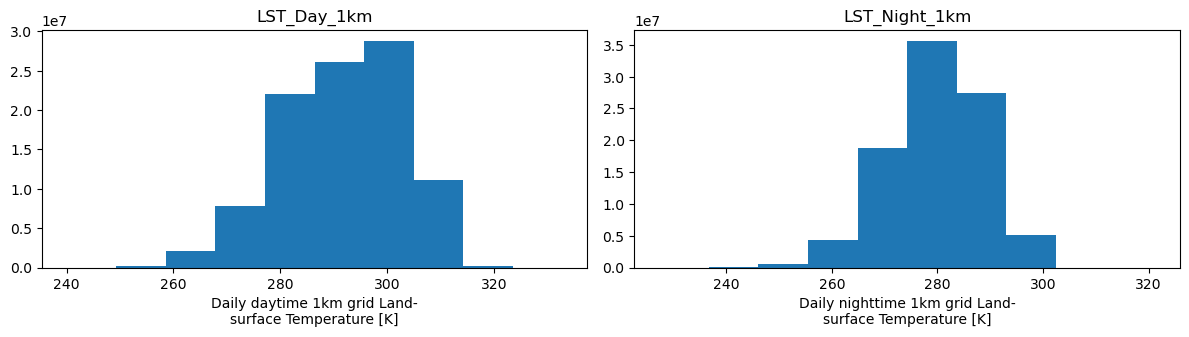

In [15]:
#PLot  the distribution variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
lst_day['LST_Day_1km'].plot()
plt.title("LST_Day_1km")

plt.subplot(2,2,2)
lst_night['LST_Night_1km'].plot()
plt.title("LST_Night_1km")
plt.savefig("lst_plot.png")
plt.show()

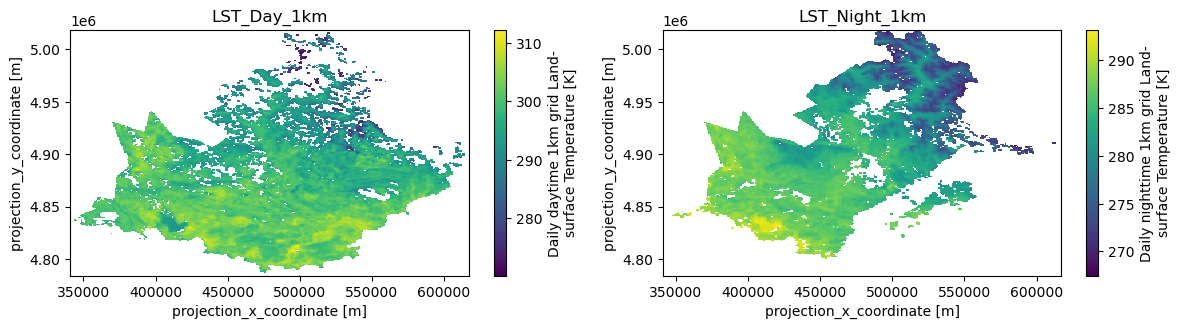

In [13]:
#PLot the variables at a specific time
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
lst_day['LST_Day_1km'][150].plot()
plt.title("LST_Day_1km")

plt.subplot(2,2,2)
lst_night['LST_Night_1km'][150].plot()
plt.title("LST_Night_1km")
#plt.savefig("lst.png")
plt.show()

### Active fire

In [60]:
# Active fire
print(active_fire)

<xarray.Dataset>
Dimensions:                (time: 146, ydim: 505, xdim: 595)
Coordinates:
  * time                   (time) object 2010-01-01 00:00:00 ... 2022-02-01 0...
  * ydim                   (ydim) float64 5.018e+06 5.017e+06 ... 4.784e+06
  * xdim                   (xdim) float64 3.412e+05 3.417e+05 ... 6.164e+05
Data variables:
    crs                    int8 ...
    Burn_Date              (time, ydim, xdim) float32 ...
    Burn_Date_Uncertainty  (time, ydim, xdim) timedelta64[ns] ...
    First_Day              (time, ydim, xdim) float32 ...
    Last_Day               (time, ydim, xdim) float32 ...
    QA                     (time, ydim, xdim) float32 ...
Attributes:
    title:        MCD64A1.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.12
    references:   See README.md
    history:      See README.md


In [61]:
# Print time range
print_start_end_date(active_fire)

Start date :  2010-01-01 00:00:00
End date:  2022-02-01 00:00:00


In [62]:
# Print the temporal resolution
print(active_fire['time'].diff('time').values/ np.timedelta64(1, 'D'))

[31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30.
 31. 31. 30. 31. 30. 31. 31. 29. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.
 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30.
 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.
 31. 29. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30.
 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.
 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 29. 31. 30. 31. 30.
 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.
 31.]


In [64]:
# Lookup on the variables Burn_Date
print(active_fire['Burn_Date'])


<xarray.DataArray 'Burn_Date' (time: 146, ydim: 505, xdim: 595)>
[43869350 values with dtype=float32]
Coordinates:
  * time     (time) object 2010-01-01 00:00:00 ... 2022-02-01 00:00:00
  * ydim     (ydim) float64 5.018e+06 5.017e+06 ... 4.785e+06 4.784e+06
  * xdim     (xdim) float64 3.412e+05 3.417e+05 3.422e+05 ... 6.16e+05 6.164e+05
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     366
    long_name:     ordinal day of burn
    water:         -2


In [65]:
# Lookup on the variables First_Day
print(active_fire['First_Day'])

<xarray.DataArray 'First_Day' (time: 146, ydim: 505, xdim: 595)>
[43869350 values with dtype=float32]
Coordinates:
  * time     (time) object 2010-01-01 00:00:00 ... 2022-02-01 00:00:00
  * ydim     (ydim) float64 5.018e+06 5.017e+06 ... 4.785e+06 4.784e+06
  * xdim     (xdim) float64 3.412e+05 3.417e+05 3.422e+05 ... 6.16e+05 6.164e+05
Attributes:
    grid_mapping:  crs
    valid_min:     1
    valid_max:     366
    long_name:     first day of reliable change detection
    water:         -2


In [16]:
# Lookup on the variables Last_Day
print(active_fire['Last_Day'])


<xarray.DataArray 'Last_Day' (time: 146, ydim: 505, xdim: 595)>
[43869350 values with dtype=float32]
Coordinates:
  * time     (time) object 2010-01-01 00:00:00 ... 2022-02-01 00:00:00
  * ydim     (ydim) float64 5.018e+06 5.017e+06 ... 4.785e+06 4.784e+06
  * xdim     (xdim) float64 3.412e+05 3.417e+05 3.422e+05 ... 6.16e+05 6.164e+05
Attributes:
    grid_mapping:  crs
    valid_min:     1
    valid_max:     366
    long_name:     last day of reliable change detection
    water:         -2


In [17]:
# Lookup on the variables Burn_Date_Uncertainty
print(active_fire['Burn_Date_Uncertainty'])

<xarray.DataArray 'Burn_Date_Uncertainty' (time: 146, ydim: 505, xdim: 595)>
[43869350 values with dtype=timedelta64[ns]]
Coordinates:
  * time     (time) object 2010-01-01 00:00:00 ... 2022-02-01 00:00:00
  * ydim     (ydim) float64 5.018e+06 5.017e+06 ... 4.785e+06 4.784e+06
  * xdim     (xdim) float64 3.412e+05 3.417e+05 3.422e+05 ... 6.16e+05 6.164e+05
Attributes:
    grid_mapping:  crs
    long_name:     uncertainty in day of burn


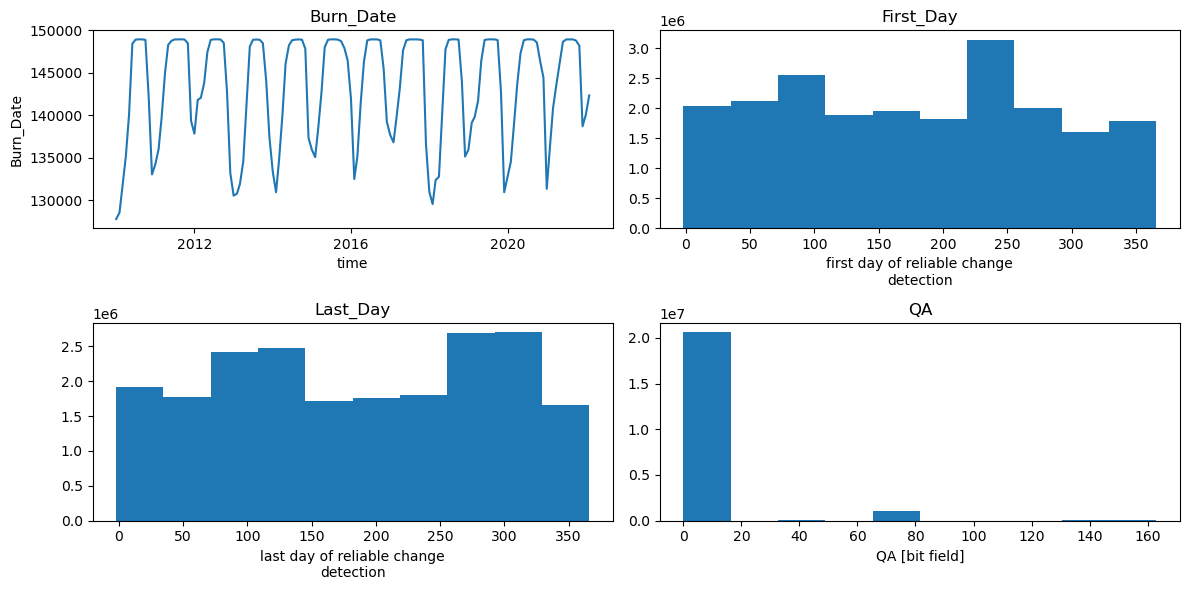

In [20]:
# Plot time series of the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
active_fire['Burn_Date'].count(dim=['ydim','xdim']).plot()
plt.title("Burn_Date")

plt.subplot(2,2,2)
active_fire['First_Day'].plot()
plt.title("First_Day")

plt.subplot(2,2,3)
active_fire['Last_Day'].plot()
plt.title("Last_Day")

plt.subplot(2,2,4)
active_fire['QA'].plot()
plt.title("QA")


#plt.savefig("active_fire_plot.png")
plt.show()


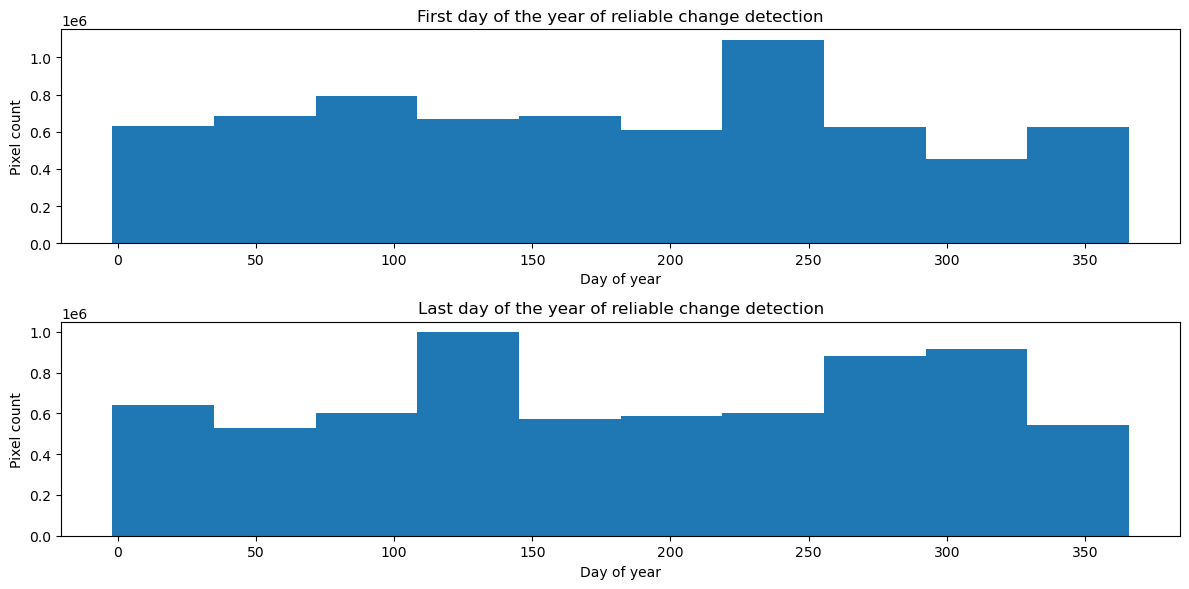

In [26]:
# Plot the count of the variables within a specific time range
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,1,1)
active_fire['First_Day'].sel(time=slice('2016-01-01','2019-12-31')).plot()
plt.title("First day of the year of reliable change detection")
# Rename the x and y axis
plt.xlabel("Day of year")
plt.ylabel("Pixel count")

plt.subplot(2,1,2)
active_fire['Last_Day'].sel(time=slice('2016-01-01','2019-12-31')).plot()
plt.title("Last day of the year of reliable change detection")
# Rename the x and y axis
plt.xlabel("Day of year")
plt.ylabel("Pixel count")
plt.savefig("FirstDay_LastDay_plot.png")
plt.show()

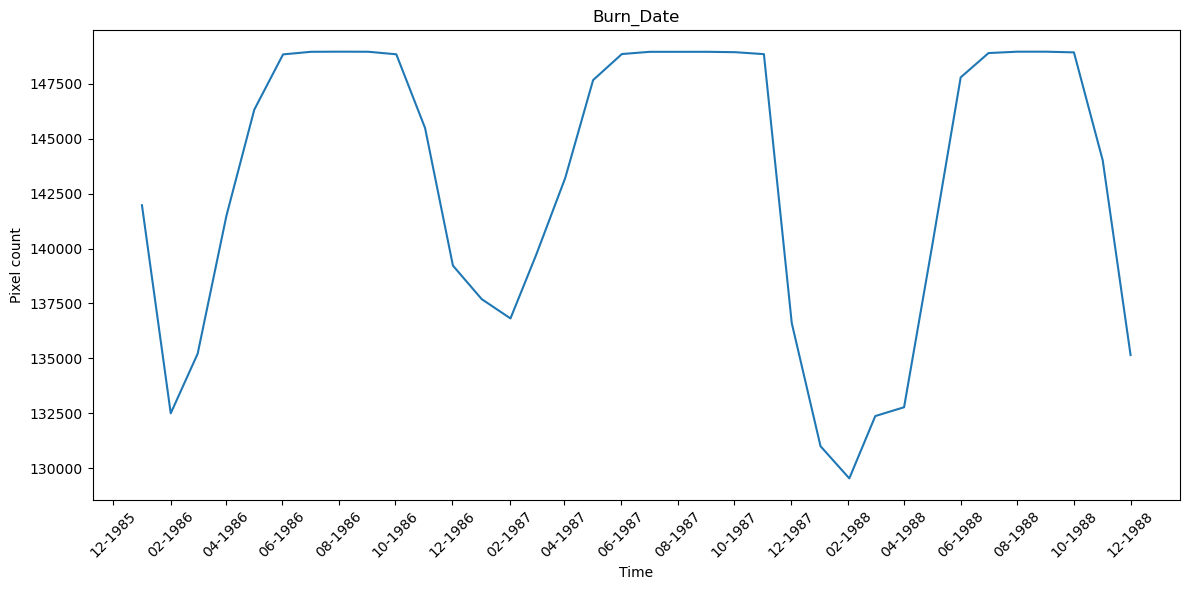

<Figure size 1200x600 with 0 Axes>

In [41]:
# Plot the count of the variables within a specific time range
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

active_fire['Burn_Date'].sel(time=slice('2016-01-01','2018-12-31')).count(dim=['ydim','xdim']).plot()
plt.title("Burn_Date")
# Rename the x and y axis
plt.xlabel("Time")
plt.ylabel("Pixel count")
# Adding month and year to the x axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# Rotate the x axis labels
plt.xticks(rotation=45)
# Adding a cursor to the plot

cursor = Cursor(plt.gca(), useblit=True, color='red', linewidth=1)

plt.show()
plt.savefig("Burn_Date_plot.png")

### Burn_Mask

In [66]:
# Burn_Mask
print(burn_mask)

<xarray.Dataset>
Dimensions:   (time: 583, ydim: 253, xdim: 298)
Coordinates:
  * time      (time) object 2009-12-27 00:00:00 ... 2022-08-29 00:00:00
  * ydim      (ydim) float64 5.018e+06 5.017e+06 ... 4.786e+06 4.785e+06
  * xdim      (xdim) float64 3.415e+05 3.424e+05 ... 6.157e+05 6.167e+05
Data variables:
    crs       int8 ...
    FireMask  (time, ydim, xdim) float32 ...
    QA        (time, ydim, xdim) float32 ...
Attributes:
    title:        MYD14A2.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.12
    references:   See README.md
    history:      See README.md


In [67]:
# Print time range
print_start_end_date(burn_mask)

Start date :  2009-12-27 00:00:00
End date:  2022-08-29 00:00:00


In [68]:
# Print the temporal resolution
print(burn_mask['time'].diff('time').values/ np.timedelta64(1, 'D'))

[ 5.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  5.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  5.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  6.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  5.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  5.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8

In [70]:
# lookup on the variables
print(burn_mask['FireMask'])

<xarray.DataArray 'FireMask' (time: 583, ydim: 253, xdim: 298)>
[43954702 values with dtype=float32]
Coordinates:
  * time     (time) object 2009-12-27 00:00:00 ... 2022-08-29 00:00:00
  * ydim     (ydim) float64 5.018e+06 5.017e+06 ... 4.786e+06 4.785e+06
  * xdim     (xdim) float64 3.415e+05 3.424e+05 ... 6.157e+05 6.167e+05
Attributes:
    grid_mapping:  crs
    valid_min:     0
    valid_max:     9
    long_name:     FireMask
    legend:        Classes:\n0 missing input data\n1 not processed (obsolete)...


In [71]:
# Print the legend of the variable FireMask
print(burn_mask['FireMask'].legend)

Classes:
0 missing input data
1 not processed (obsolete)
2 not processed (obsolete)
3 non-fire water
4 cloud
5 non-fire land
6 unknown
7 fire (low confidence)
8 fire (nominal confidence)
9 fire (high confidence)


In [83]:
# Sum of the count when FireMask is equal to 7,8 or 9
count_fire = burn_mask['FireMask'].where(burn_mask['FireMask']>=7).count(dim=['ydim','xdim'])

In [84]:
# Sum all the count
count_all = burn_mask['FireMask'].count(dim=['ydim','xdim']).values

print(count_fire.values/count_all)

[5.31194391e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.32798598e-04 0.00000000e+00 2.65597195e-05
 0.00000000e+00 2.12477756e-04 3.98395793e-04 2.65597195e-05
 2.12477756e-04 1.59358317e-04 7.96791586e-05 1.59358317e-04
 5.31194391e-05 5.31194391e-05 1.06238878e-04 2.12477756e-04
 0.00000000e+00 1.85918037e-04 2.65597195e-04 1.32798598e-04
 2.12477756e-04 2.92156915e-04 1.08894850e-03 5.31194391e-05
 1.32798598e-04 7.96791586e-05 1.59358317e-04 2.12477756e-04
 7.96791586e-05 7.96791586e-05 4.24955512e-04 4.24955512e-04
 1.32798598e-04 6.63992988e-04 7.17112427e-04 7.96791586e-05
 5.31194391e-05 1.59358317e-04 2.65597195e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.59358317e-04 2.65597195e-04 7.17112427e-04
 1.59358317e-04 5.31194391e-05 2.65597195e-05 4.78074952e-04
 1.85918037e-04 5.31194391e-05 5.31194391e-05 2.65597195e-04
 1.59358317e-04 0.00000000e+00 3.18716634e-04 7.96791586e-05
 0.00000000e+00 2.655971

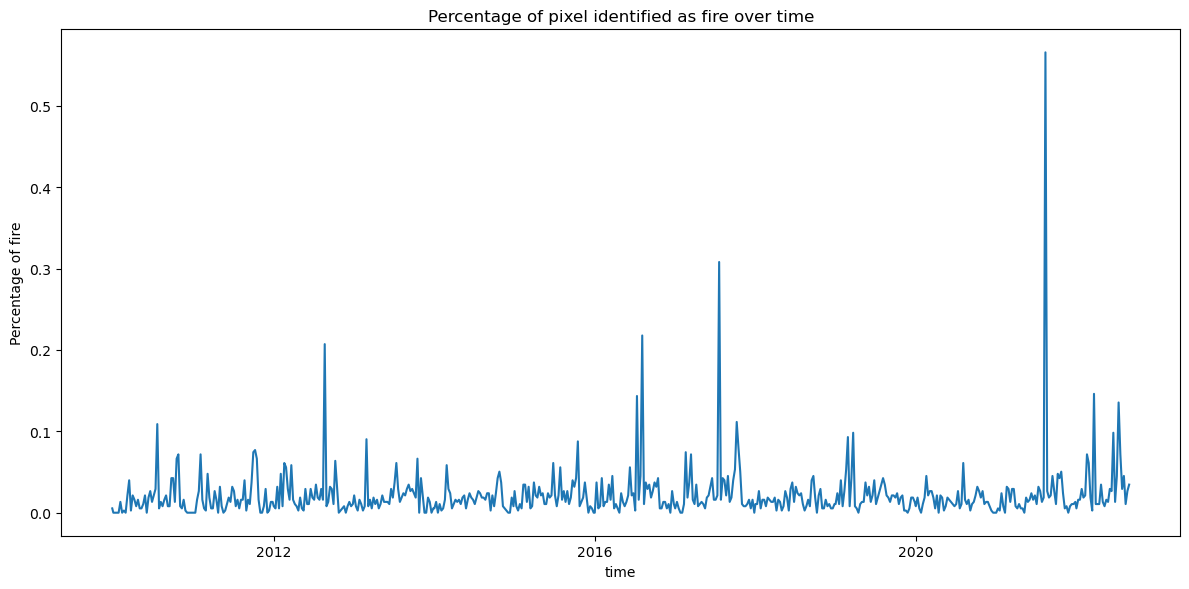

In [9]:
# Plot the percentage of fire
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(1,1,1)
(burn_mask['FireMask'].where(burn_mask['FireMask']>=7).count(dim=['ydim','xdim'])*100/burn_mask['FireMask'].count(dim=['ydim','xdim'])).plot()
plt.title("Percentage of pixel identified as fire over time")
#rename the y axis
plt.gca().set_ylabel('Percentage of fire')


plt.savefig("percentage_fire.png")
plt.show()


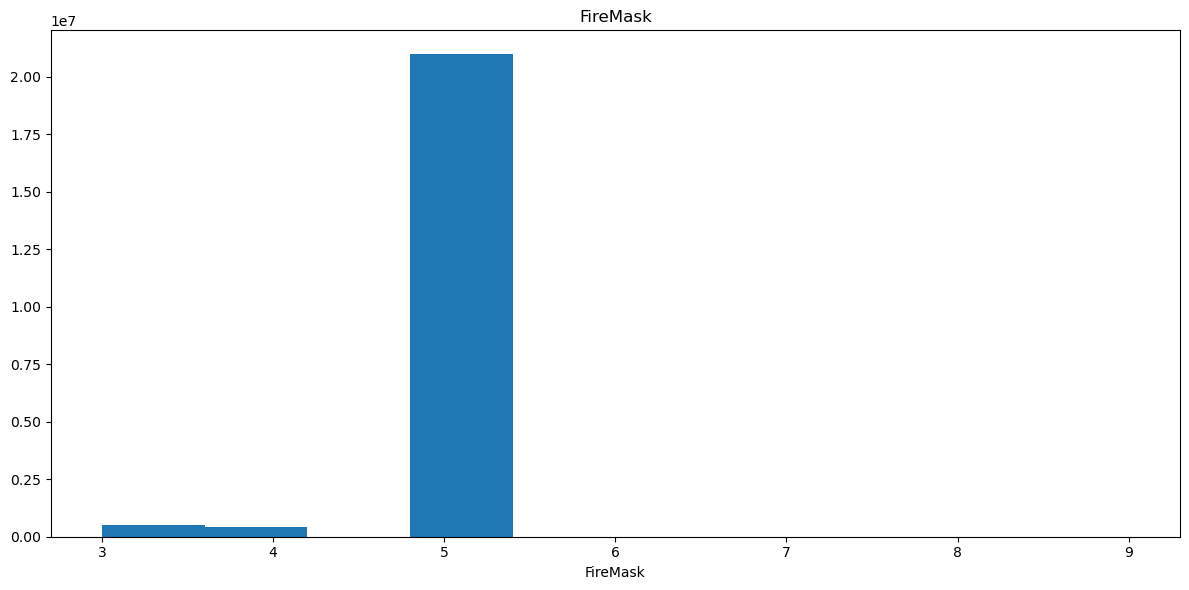

In [72]:
# Plot the variable FireMask
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

burn_mask['FireMask'].plot()
plt.title("FireMask")

plt.show()


### FWI

In [99]:
# FWI
print(fwi)

<xarray.Dataset>
Dimensions:         (rlon: 424, rlat: 412, time: 4748)
Coordinates:
  * rlon            (rlon) float64 -28.38 -28.27 -28.16 ... 17.94 18.05 18.16
  * rlat            (rlat) float64 -23.38 -23.27 -23.16 ... 21.62 21.73 21.84
  * time            (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2022-12-31
    lon             (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
    lat             (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
Data variables:
    rotated_pole    (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    fwi-daily-proj  (time, rlat, rlon) float64 dask.array<chunksize=(365, 412, 424), meta=np.ndarray>
Attributes: (12/14)
    creation_date:  2021-06-25-T22:30:22Z
    Frequency:      Daily
    institution:    National Observatory of Athens, URL: http://www.noa.gr
    contact:        cgiannak@noa.gr
    title:          Daily FWI Values
    references:     van Wagner, C. E., (1987). Development and st

In [100]:
# Print time range
print_start_end_date(fwi)

Start date :  2010-01-01T00:00:00.000000000
End date:  2022-12-31T00:00:00.000000000


In [101]:
# Print the temporal resolution
print(fwi['time'].diff('time').values/ np.timedelta64(1, 'D'))

[1. 1. 1. ... 1. 1. 1.]


In [121]:
# Spatial resolution
print(fwi['rlon'].diff('rlon').values)

[0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 

In [102]:
# Lookup on the variable fwi-daily-proj
print(fwi['fwi-daily-proj'])

<xarray.DataArray 'fwi-daily-proj' (time: 4748, rlat: 412, rlon: 424)>
dask.array<concatenate, shape=(4748, 412, 424), dtype=float64, chunksize=(366, 412, 424), chunktype=numpy.ndarray>
Coordinates:
  * rlon     (rlon) float64 -28.38 -28.27 -28.16 -28.05 ... 17.94 18.05 18.16
  * rlat     (rlat) float64 -23.38 -23.27 -23.16 -23.05 ... 21.62 21.73 21.84
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2022-12-31
    lon      (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
Attributes:
    grid_mapping:   rotated_pole
    standard_name:  fwi-daily-proj
    long_name:      Fire Weather Index
    units:          1
    cell_methods:   time: point
    short_name:     fwi-daily-proj


In [127]:
# Look up on the variable fwi-daily-proj
print('The mean of the variable fwi-daily-proj is: ', fwi['fwi-daily-proj'].mean().values)
print('The min of the variable fwi-daily-proj is: ', fwi['fwi-daily-proj'].min().values)
print('The max of the variable fwi-daily-proj is: ', fwi['fwi-daily-proj'].max().values)


The mean of the variable fwi-daily-proj is:  21.940480018737972
The min of the variable fwi-daily-proj is:  1.0
The max of the variable fwi-daily-proj is:  473.5321044921875


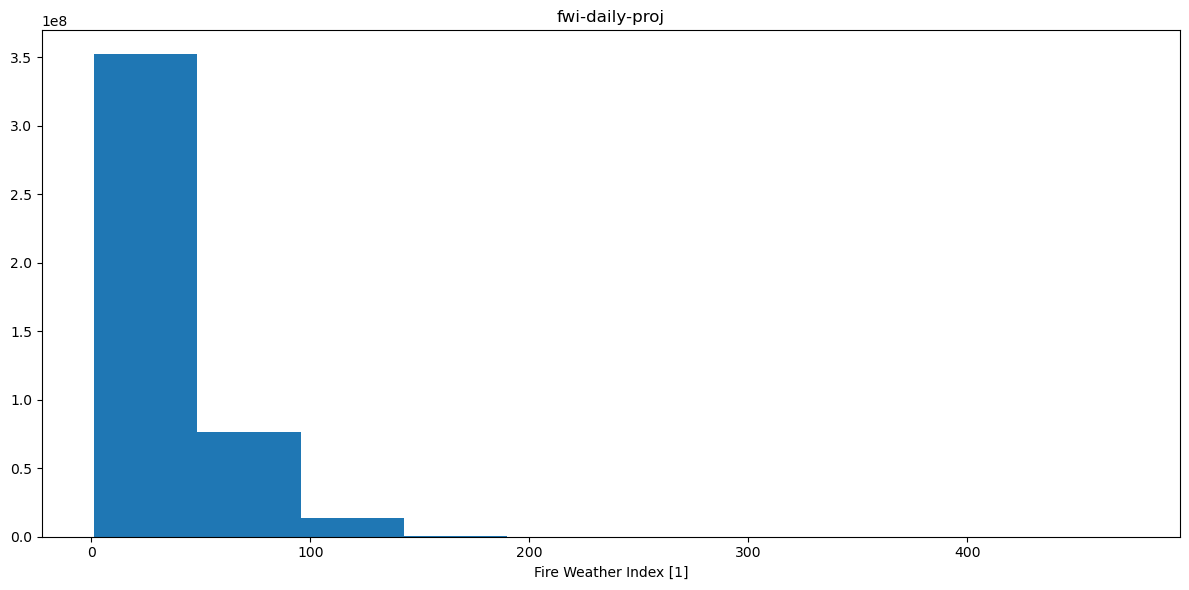

In [104]:
# Plot the variable fwi-daily-proj
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

fwi['fwi-daily-proj'].plot()
plt.title("fwi-daily-proj")

plt.show()

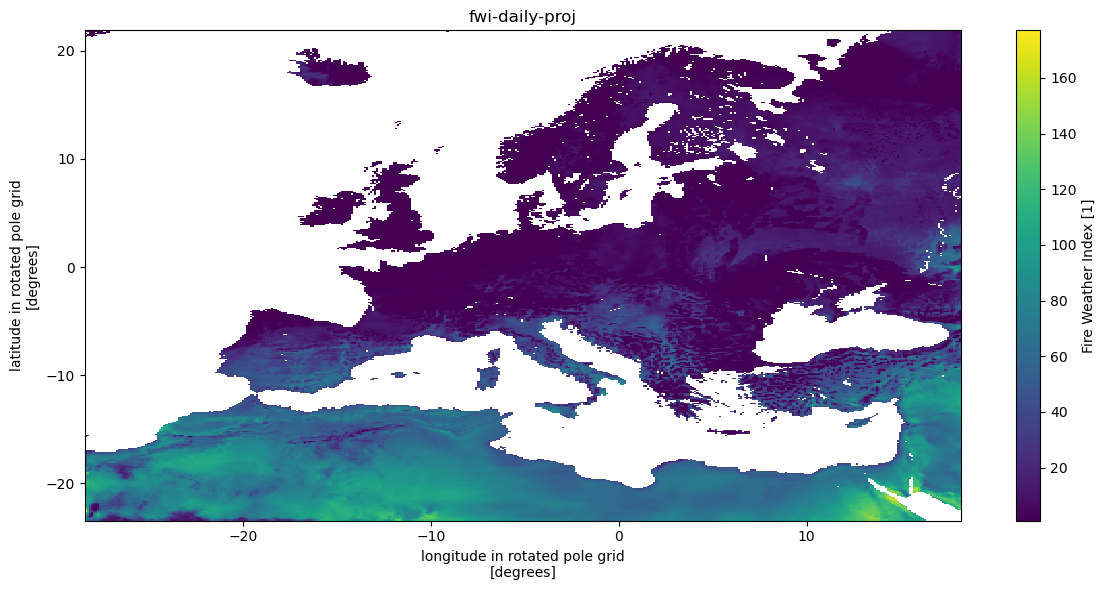

In [110]:
# Plot the variable fwi-daily-proj for a specific time
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

fwi['fwi-daily-proj'].sel(time='2019-07-01').plot()
plt.title("fwi-daily-proj")

plt.show()

### Density

In [117]:
# Density
print(density)

<xarray.DataArray (y: 1171, x: 1766)>
[2067986 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 -5.147 -5.139 -5.13 -5.122 ... 9.545 9.553 9.561
  * y            (y) float64 51.09 51.08 51.07 51.06 ... 41.36 41.35 41.35 41.34
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  53646.03515625
    STATISTICS_MEAN:     119.46772920052
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   644.66432858711
    _FillValue:          -99999.0
    scale_factor:        1.0
    add_offset:          0.0


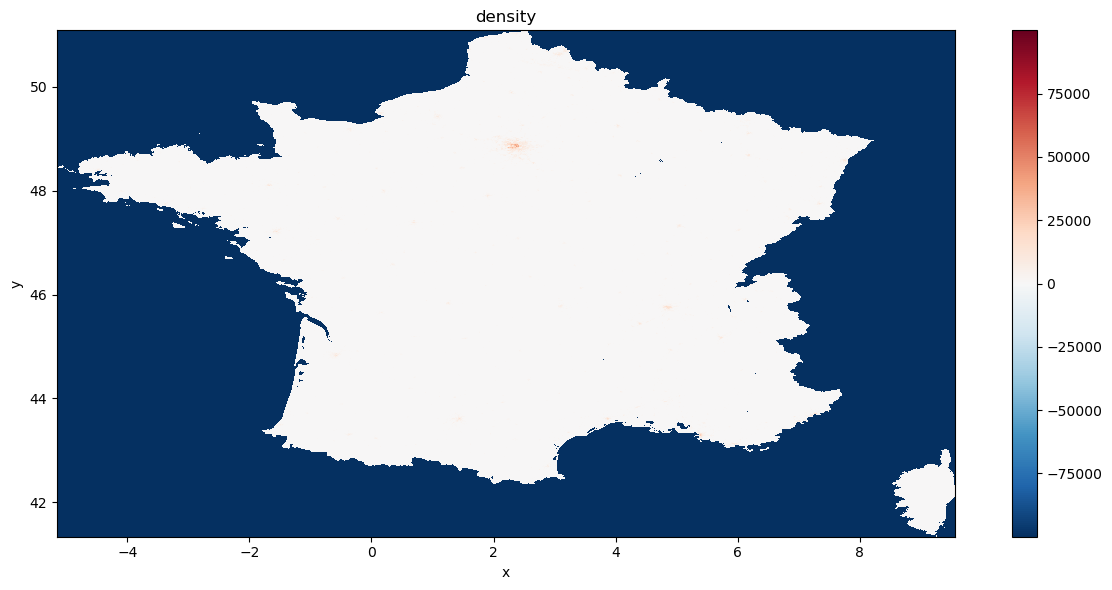

In [119]:
# plot the variable
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

density.plot()
plt.title("density")

plt.show()


In [11]:
# Print time range
print_start_end_date(era)

Start date :  2010-01-01T04:00:00.000000000
End date:  2022-07-31T20:00:00.000000000


In [12]:
# Print descriptive statistics of the dataset
print_dataset_statistics(era)

Descriptive statistics of the dataset
The mean of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float32 0.2543
    v10      float32 -0.6489
    t2m      float32 284.2
    tp       float32 0.001342>
The median of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float64 0.2021
    v10      float64 -0.4645
    t2m      float64 284.2
    tp       float64 9.31e-06>
The standard deviation of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float64 1.644
    v10      float64 2.106
    t2m      float64 23.65
    tp       float64 0.003943>
The minimum value of the dataset is :  <bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    u10      float64 -17.09
    v10      float64 -15.89
    t2m      float64 244.5
    tp       float64 0.0>
The maximum value of the dataset is :  <bo

## Looking for the time range and resolution of the datasets

In [48]:
print_start_end_date(evap)

Start date :  2021-01-01 00:00:00
End date:  2022-08-29 00:00:00


In [9]:
time_resolution(ds)

numpy.timedelta64(1382400000000000,'ns')

In [11]:
convert_nanoseconds_to_days(time_resolution(ds))

numpy.timedelta64(16,'ns')

In [12]:
# Check the range of the value of the data variables
print(ds.min())

<xarray.Dataset>
Dimensions:                   ()
Data variables:
    crs                       int8 -127
    _1_km_16_days_EVI         float64 -0.2
    _1_km_16_days_NDVI        float64 -0.2
    _1_km_16_days_VI_Quality  float64 2.057e+03


In [13]:
print(ds.max())

<xarray.Dataset>
Dimensions:                   ()
Data variables:
    crs                       int8 -127
    _1_km_16_days_EVI         float64 0.8983
    _1_km_16_days_NDVI        float64 1.0
    _1_km_16_days_VI_Quality  float64 6.349e+04


Plotting the variables from LAI dataset

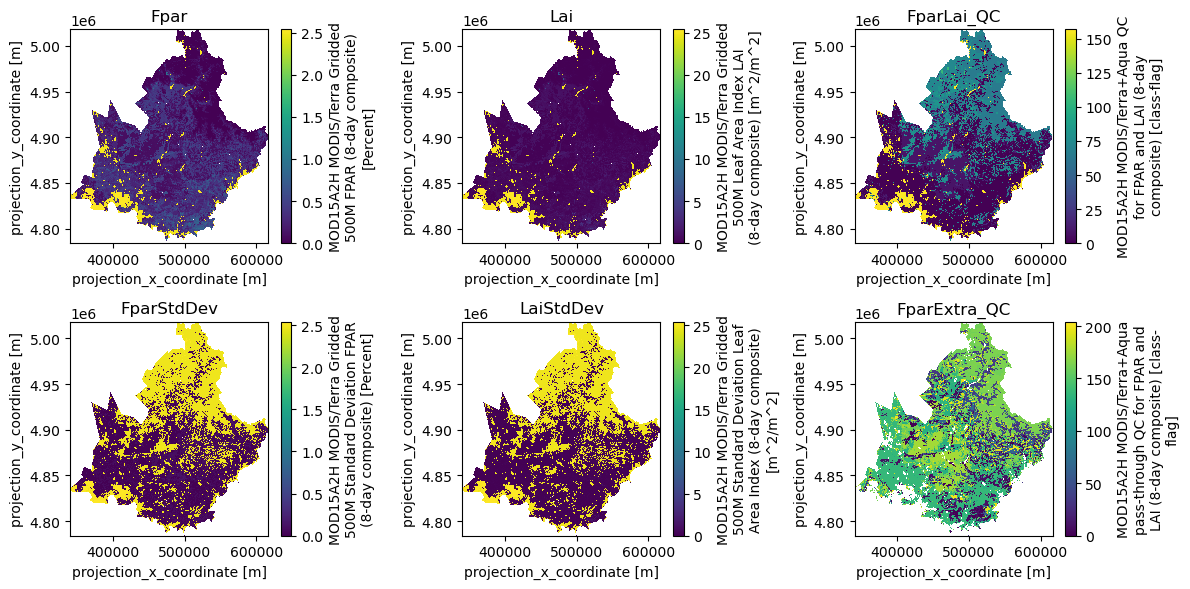

In [33]:
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'][1].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'][1].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'][1].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'][1].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'][1].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'][1].plot()
plt.title("FparExtra_QC")

plt.savefig("LAI_plot.png")
plt.show()

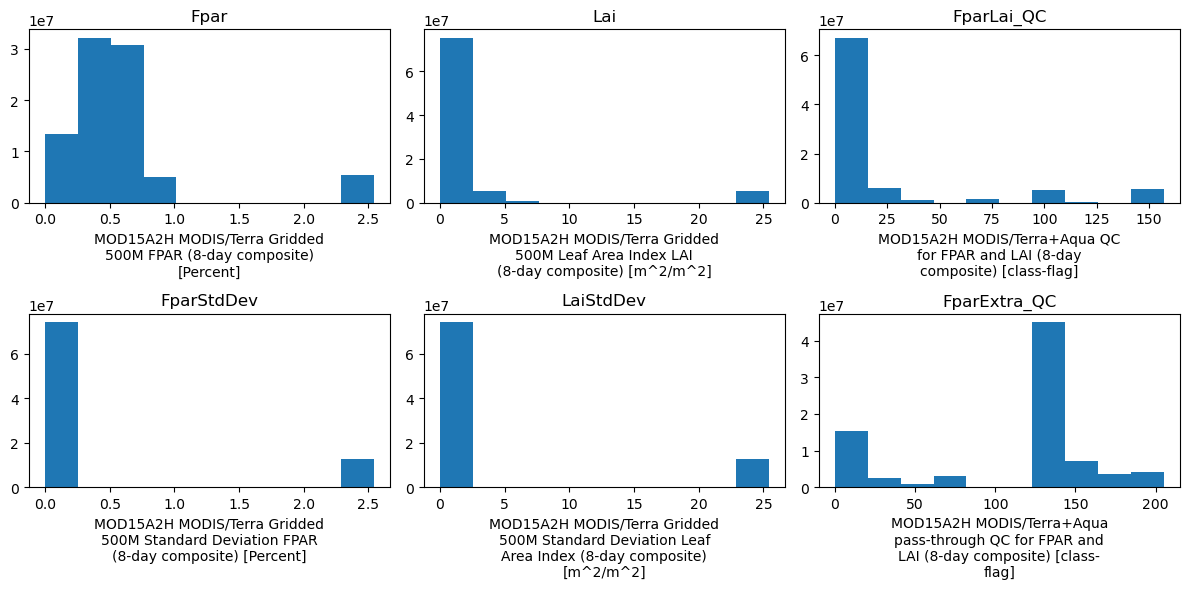

In [35]:
#PLot distribution of the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'].plot()
plt.title("FparExtra_QC")

plt.savefig("LAI_distrib.png")
plt.show()



In [ ]:
# Plot the distribution of the variables of evap
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
evap['E'].plot()
plt.title("E")

plt.subplot(2,3,2)
evap['ES'].plot()
plt.title("ES")

plt.subplot(2,3,4)
evap['ET'].plot()
plt.title("ET")

plt.subplot(2,3,5)
evap['E_corr'].plot()


In [48]:
# Check the coordinate system of the data
print(ds.crs)

<xarray.DataArray 'crs' ()>
array(-127, dtype=int8)
Attributes:
    grid_mapping_name:                      sinusoidal
    _CoordinateAxisTypes:                   GeoX GeoY
    spatial_ref:                            PROJCS["unknown",GEOGCS["unknown"...
    radius_of_sphere:                       6371007.181
    longitude_of_central_meridian:          0
    longitude_of_projection_origin:         0
    straight_vertical_longitude_from_pole:  0
    false_easting:                          0
    false_northing:                         0


In [49]:
# Check the spatial resolution of the data
#print(ndvi["_1_km_16_days_EVI"][0].res)